In [26]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

In [27]:
#Read in cleaned dataset, create list of survived results for later
path = "Resources/cleaned_train.csv"
full_dataframe = pd.read_csv(path)
survived_list = list(full_dataframe["Survived"])
full_dataframe.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [28]:
#Drop survived column
final_titanic_df = full_dataframe.drop(labels="Survived", axis=1)
final_titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [29]:
#Set target variable to survived list, pass in dataframe from above as X values, define splitting method as 42 (arbitrary)
target = survived_list
X_train, X_test, y_train, y_test = train_test_split(final_titanic_df, target, random_state=42)

k: 1, Train/Test Score: 0.991/0.665
k: 3, Train/Test Score: 0.841/0.676
k: 5, Train/Test Score: 0.826/0.665
k: 7, Train/Test Score: 0.794/0.704
k: 9, Train/Test Score: 0.764/0.682
k: 11, Train/Test Score: 0.733/0.670
k: 13, Train/Test Score: 0.727/0.676
k: 15, Train/Test Score: 0.740/0.687
k: 17, Train/Test Score: 0.735/0.670
k: 19, Train/Test Score: 0.736/0.693


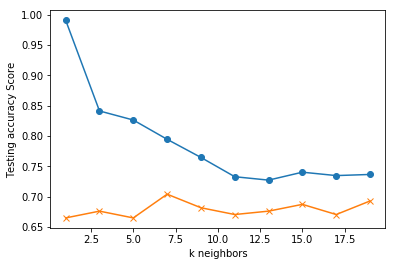

In [31]:
#Run KNN for many K values (1 through 19)
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
#Plot Results    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

k: 1, Train/Test Score: 0.991/0.665
k: 3, Train/Test Score: 0.993/0.665
k: 5, Train/Test Score: 0.993/0.670
k: 7, Train/Test Score: 0.993/0.676
k: 9, Train/Test Score: 0.993/0.698
k: 11, Train/Test Score: 0.993/0.698
k: 13, Train/Test Score: 0.993/0.682
k: 15, Train/Test Score: 0.993/0.687
k: 17, Train/Test Score: 0.993/0.687
k: 19, Train/Test Score: 0.993/0.682


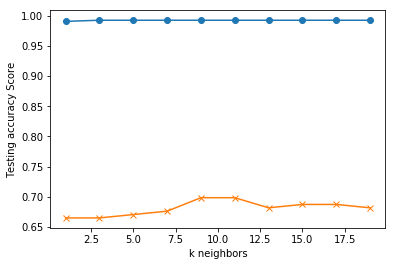

In [32]:
#Change KNN parameters to try to improve accuracy, weight='distance' was about equally as accurate in this case
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [33]:
target = survived_list
X_train, X_test, y_train, y_test = train_test_split(final_titanic_df, target, random_state=42)

In [34]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.993/0.760
k: 3, Train/Test Score: 0.993/0.760
k: 5, Train/Test Score: 0.993/0.782
k: 7, Train/Test Score: 0.993/0.782
k: 9, Train/Test Score: 0.993/0.777
k: 11, Train/Test Score: 0.993/0.777
k: 13, Train/Test Score: 0.993/0.777
k: 15, Train/Test Score: 0.993/0.777
k: 17, Train/Test Score: 0.993/0.777
k: 19, Train/Test Score: 0.993/0.777


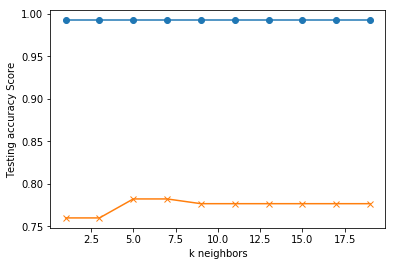

In [35]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [38]:
#Test a prediction with the most accurate KNN model, print survival probabilities at the bottom
#Prediction array format: [ PassengerClass, Gender(Male:0,Female:1), Age, SibSP, Parch, FareGroup, EmbarkedLocation(S:0,C:1,Q:2) ]
values = [[1,0,25,0,0,0,1]]
scaled_values = X_scaler.transform(values)
print(scaled_values)
sample = scaled_values
prediction = knn.predict(sample)
prediction1 = knn.predict_proba(sample)
print(prediction)
print(prediction1)
print(prediction1[0][1])

[[-1.44600986 -0.75426451 -0.34715939 -0.54117137 -0.50685817 -0.70649053
   1.3275837 ]]
[1]
[[0.41251542 0.58748458]]
0.5874845763991455
